In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

print(tf.__version__)
print(len(tf.config.experimental.list_physical_devices('GPU')))

2.19.0
0


In [2]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    figure(figsize=(10, 7), dpi=80)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm[:,0])

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm[i, j]*100/1000) + "%",
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')

In [3]:
#IMPORTAÇÃO E NORRMALIZAÇÃO
(x_train, y_train), (x_test,y_test) = keras.datasets.cifar10.load_data()
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

#CRIAR DATASET
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(50000).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [8]:
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=(32, 32,3),batch_size=64),

        keras.layers.Conv2D(32, (3, 3), name="conv1", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn1"),
        keras.layers.Conv2D(32, (3, 3),name="conv2", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn2"),
        keras.layers.MaxPooling2D(pool_size=(2, 2),name="mp1"),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(64, (3, 3),name="conv3", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn3"),
        keras.layers.Conv2D(64, (3, 3),name="conv4", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn4"),
        keras.layers.MaxPooling2D(pool_size=(2, 2),name="mp2"),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(128, (3, 3),name="conv5", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn5"),
        keras.layers.Conv2D(128, (3, 3),name="conv6", activation='relu', kernel_initializer='he_uniform', padding='same'),
        keras.layers.BatchNormalization(name="bn6"),
        keras.layers.MaxPooling2D(pool_size=(2, 2),name="mp3"),
        keras.layers.Dropout(0.2),

        keras.layers.Flatten(name = "flatten"),

        keras.layers.Dense(256, name="dense1", activation='relu'),
        keras.layers.Dense(128, name="dense2", activation='relu', kernel_initializer='he_uniform'),
        keras.layers.BatchNormalization(name="bn7"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, name="dense3", activation='softmax')
    ],
    name="modelo-0.0",
)

model.summary()

Model: "modelo-0.0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (64, 32, 32, 32)       │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (64, 32, 32, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (64, 32, 32, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (64, 32, 32, 32)       │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp1 (MaxPooling2D)              │ (64, 16, 16, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (64, 16, 16, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (64, 16, 16, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (64, 16, 16, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (64, 16, 16, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (64, 16, 16, 64)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp2 (MaxPooling2D)              │ (64, 8, 8, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (64, 8, 8, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (64, 8, 8, 128)        │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn5 (BatchNormalization)        │ (64, 8, 8, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv6 (Conv2D)                  │ (64, 8, 8, 128)        │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn6 (BatchNormalization)        │ (64, 8, 8, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mp3 (MaxPooling2D)              │ (64, 4, 4, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (64, 4, 4, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (64, 2048)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (64, 256)              │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (64, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn7 (BatchNormalization)        │ (64, 128)              │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (64, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (64, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 848,042 (3.24 MB)

 Trainable params: 846,890 (3.23 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

class PruningTrainer:
    def __init__(self, model, train_ds, test_ds, loss_fn,
                 train_accuracy, test_accuracy,
                 epochs=40, alpha=0.5, learning_rate=0.05, momentum=0.9):

        self.model = model
        self.train_ds = train_ds
        self.test_ds = test_ds
        self.loss_fn = loss_fn
        self.train_accuracy = train_accuracy
        self.test_accuracy = test_accuracy

        # hyperparameters
        self.epochs = epochs
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.momentum = momentum

        # logs
        self.model_sparsity = []
        self.model_train_loss = []
        self.model_train_acc = []
        self.model_test_loss = []
        self.model_test_acc = []
        self.bk = []
        self.v = [0]*len(model.trainable_weights)

    def prune_weights(self, alpha):
        """Aplica poda baseada em desvio padrão."""
        bk = []
        n_zeros, size = 0, 0
        sparsity = 0

        for layer_weights in self.model.trainable_variables:
            if 'bn' in layer_weights.name:
                bk.append(-1)
                continue
            #Lista de Pesos da camada
            f_weights = tf.reshape(layer_weights, [-1])
            #Calculo de B_k
            lim = alpha * tf.math.reduce_std(f_weights)
            bk.append(lim)

            #Máscara de poda
            mask = tf.cast(tf.where(tf.abs(layer_weights) > lim, 1, 0), tf.float32)
            layer_weights.assign(tf.math.multiply(layer_weights, mask))

            #Calculo de esparsidade
            flat_array = np.array(tf.reshape(mask, [-1]))
            n_zeros += np.count_nonzero(flat_array == 0)
            size += flat_array.shape[0]
            sparsity = n_zeros * 100 / size

        return bk, sparsity

    def train(self):
        np.set_printoptions(threshold=np.inf)

        for epoch in range(self.epochs):
            #print(epoch)
            acc_epoch_mean, loss_epoch_mean = [], []
            acct_epoch_mean, losst_epoch_mean = [], []
            sparsity = 0

            # Treino
            for step, (x_batch_train, y_batch_train) in enumerate(self.train_ds):
                with tf.GradientTape() as tape:
                    pred = self.model(x_batch_train, training=True)
                    loss = self.loss_fn(y_batch_train, pred)

                grads = tape.gradient(loss, self.model.trainable_weights)

                #if self.alpha > 0:
                #    self.bk, sparsity = self.prune_weights(self.alpha)

                for i, layer_weights in enumerate(self.model.trainable_variables):
                    #grads[i] = grads[i] * self.learning_rate
                    self.v[i] = tf.math.subtract(self.momentum*self.v[i], self.learning_rate*grads[i])
                    layer_weights.assign(tf.math.add(layer_weights, self.v[i]))

                if self.alpha > 0:
                    self.bk, sparsity = self.prune_weights(self.alpha)

                predictions = tf.argmax(pred, axis=1, output_type=tf.int32)
                #yy = tf.argmax(y_batch_train, axis=1, output_type=tf.int32)

                #print(predictions)
                #print(np.reshape(y_batch_train,-1))
                #print()
                #acc = self.train_accuracy(yy, predictions)
                acc = self.train_accuracy(np.reshape(y_batch_train,-1), predictions)

                acc_epoch_mean.append(acc)
                loss_epoch_mean.append(loss)
                train_accuracy.update_state(np.reshape(y_batch_train,-1),predictions)

            # Poda extra ao fim da época
            #if self.alpha > 0:
            #    self.bk, sparsity = self.prune_weights(self.alpha)

            # Teste
            for step, (x_batch_test, y_batch_test) in enumerate(self.test_ds):
                test_pred = self.model(x_batch_test, training=False)
                test_loss = self.loss_fn(y_batch_test, test_pred)
                test_prediction = tf.argmax(test_pred, axis=1, output_type=tf.int32)

                test_acc = self.test_accuracy(np.reshape(y_batch_test, -1), test_prediction)

                #test_acc = self.test_accuracy(y_batch_test, test_prediction)

                acct_epoch_mean.append(test_acc)
                losst_epoch_mean.append(test_loss)

            # salvar métricas
            self.model_test_acc.append(np.mean(acct_epoch_mean) * 100)
            self.model_test_loss.append(np.mean(losst_epoch_mean) * 100)
            self.model_sparsity.append(sparsity)
            self.model_train_acc.append(np.mean(acc_epoch_mean))
            self.model_train_loss.append(np.mean(loss_epoch_mean))

            print("Epoch {}/{} \t Loss = {:.3f} \t Train Acc = {:.3f}% \t Sparsity = {:.3f}% \t Test Acc = {:.3f}%".format(
                epoch + 1, self.epochs, float(loss), float(acc * 100), sparsity, float(test_acc * 100)
            ))


In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
train_accuracy = tf.keras.metrics.Accuracy()
test_accuracy = tf.keras.metrics.Accuracy()


In [11]:
trainer = PruningTrainer(model, train_ds, test_ds, loss_fn, train_accuracy, test_accuracy, epochs=2, alpha=0.5)
trainer.train()

Epoch 1/2 	 Loss = 1.427 	 Train Acc = 49.885% 	 Sparsity = 53.587% 	 Test Acc = 53.980%
Epoch 2/2 	 Loss = 0.938 	 Train Acc = 57.876% 	 Sparsity = 58.957% 	 Test Acc = 57.650%


In [ ]:
trainer.model.save("prune.h5")

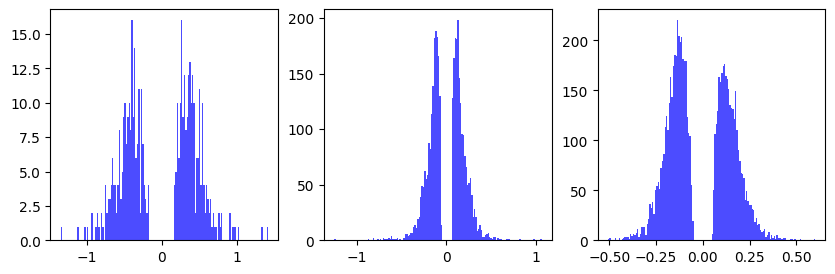

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
i = 0
for l in trainer.model.trainable_weights:
    if l.name == "kernel":
        f_w = tf.reshape(l, [-1])
        f_w_nonzero = tf.boolean_mask(f_w, f_w != 0)
        axes[i].hist(f_w_nonzero, bins=150, color="blue", alpha=0.7)
        i+=1
        if i == 3:
            break